In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

# Simuler un graphe cordal $\Theta$ et les données data avec le fichier sampling

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(10)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
while not graph.is_chordal:
    simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
    graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
data = core.read_csv(os.path.join('results', 'data.csv'))
data


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$-0.12$,$2.04$,$1.15$,$2.07$,$-0.67$,$1.80$,$0.27$,$1.87$,$0.23$,$-1.03$
1,$-0.51$,$-0.14$,$1.19$,$0.20$,$2.96$,$1.34$,$-0.90$,$0.13$,$0.77$,$0.10$
2,$-0.58$,$-0.74$,$-1.39$,$0.73$,$0.90$,$-1.53$,$1.10$,$1.67$,$1.33$,$-0.80$
3,$-0.98$,$0.57$,$0.99$,$0.06$,$-0.33$,$0.29$,$0.05$,$-0.92$,$-0.30$,$0.80$
4,$-0.09$,$-0.92$,$0.69$,$2.14$,$2.15$,$1.41$,$-0.09$,$-0.59$,$-0.21$,$0.41$
5,$0.05$,$-0.24$,$-0.69$,$0.35$,$0.51$,$-0.07$,$0.03$,$0.39$,$-0.82$,$-0.61$
6,$-0.34$,$2.14$,$-0.06$,$1.84$,$0.34$,$0.94$,$-1.29$,$-2.92$,$-1.22$,$-0.39$
7,$0.56$,$-0.27$,$0.52$,$-1.69$,$0.87$,$0.45$,$1.25$,$-0.51$,$1.78$,$-1.59$
8,$-0.35$,$0.05$,$0.87$,$-0.05$,$0.34$,$-1.02$,$2.43$,$-0.84$,$0.71$,$0.81$
9,$0.73$,$1.24$,$0.39$,$0.26$,$0.57$,$-1.20$,$-0.82$,$-1.25$,$0.26$,$-1.71$


# Estimation par maximum vraisemblance MLE

In [5]:
mle = pgm.graphical_gaussian_estimation(algo='ml',
                                        data=data,
                                        graph=graph)

# Estimation par   newton-raphson

In [6]:
algo = os.environ.get('ALGO', 'nr')

In [7]:
import time
prev = time.time()
nre = pgm.graphical_gaussian_estimation(algo=algo,
                                        data=data,
                                        graph=graph)
curr = time.time()

# Calcul de $\widehat{\Theta}_{ML}$  et  $\widehat{\Theta}_{NR}$

In [8]:
theta_ML = mle.estimated.graph
theta_NR = nre.estimated.graph

<IPython.core.display.Javascript object>


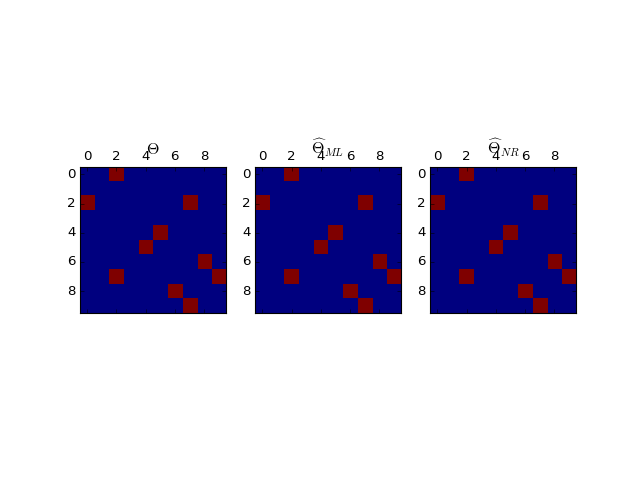

In [9]:
fig = pyplot.figure()
axes = graph.to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title(r'$\Theta$')
axes = theta_ML.to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title(r'$\widehat{\Theta}_{ML}$')
axes = theta_NR.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title(r'$\widehat{\Theta}_{NR}$')

# Comparaison des deux algorithmes.

In [10]:

LLH_ML = 2 * mle.estimated.loglikelihood(data)

LLH_NR = 2 * nre.estimated.loglikelihood(data)


(LLH_ML - LLH_NR )/LLH_ML

0.00489550007172094

In [11]:
LLH_ML, LLH_NR

(-270.89863422389817, -269.572449940626)

In [12]:
import math
with open(os.path.join('results', 'estimation.csv'), 'a') as filehandler:
    filehandler.write(', '.join([str(K), str(algo), str(curr-prev), str((LLH_ML - LLH_NR )/math.fabs(LLH_ML))]) + '\n')